In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
import matplotlib as mpl
from sklearn.preprocessing import PolynomialFeatures
from sklearn import *
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression  # Import modules needed
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from statistics import mode
#from statistics import preprocessing
#from statistics import utils
from PIL import Image
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

### Read in data

In [9]:
df = pd.read_csv('m2_valid.csv')
X1 = df.iloc[:, 5] # wind speed
X2 = df.iloc[:, 3] # atmospheric pressure
X = np.column_stack((X1, X2))
Y = df.iloc[:, 7] # wave height

## Features and target

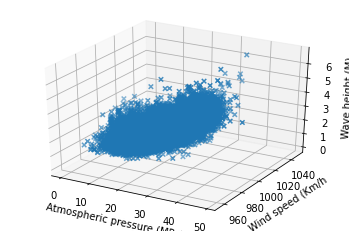

In [10]:
fig = plt.figure()
p1 = fig.add_subplot(projection='3d')
p1.scatter(X1, X2, Y, marker='x')
p1.set_xlabel('Atmospheric pressure (MPa)')
p1.set_ylabel('Wind speed (Km/h')
p1.set_zlabel('Wave height (M)')
plt.show()

## Plot alpha vs coefficient of determination

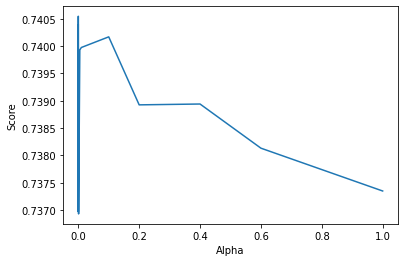

In [126]:
A_range = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.2, 0.4, 0.6, 1]
temp = []
std_error = []

poly = PolynomialFeatures(5)  # augment features
X_pol = poly.fit_transform(X)
scaler = StandardScaler()  # scale for MPL [0-1] 
X_train_pol, X_test_pol, Y_train, Y_test = train_test_split(X_pol, Y, test_size=0.2)
scaler.fit(X_train_pol)
X_train_pol = scaler.transform(X_train_pol)  
X_test_pol = scaler.transform(X_test_pol)  

for A in A_range:
    model1 = MLPRegressor(max_iter=500, alpha=A, solver='adam', hidden_layer_sizes=(16,16,16,16))
    model1.fit(X_train_pol, Y_train)
    Y_pred = model1.predict(X_test_pol)  # Predict on test data
    score = model1.score(X_test_pol, Y_test)
    temp.append(score)
    std_error.append(np.array(score).std())

plt.plot(A_range, temp)
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()

## Plot predictions with chosen alpha

0.7450418743734398


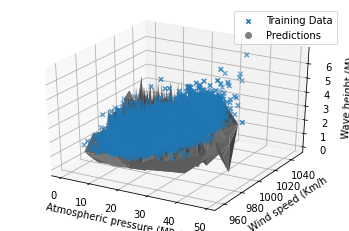

0.1390762802409805


In [124]:
poly = PolynomialFeatures(5)  # augment features
X_pol = poly.fit_transform(X)
scaler = StandardScaler()  # scale for MPL [0-1] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train_pol, X_test_pol, Y_train, Y_test = train_test_split(X_pol, Y, test_size=0.2)
scaler.fit(X_train_pol)
X_train_pol = scaler.transform(X_train_pol)  
X_test_pol = scaler.transform(X_test_pol)  


model1 = MLPRegressor(max_iter=500, alpha=0.000001, solver='adam', hidden_layer_sizes=(16,16,16,16))
model1.fit(X_train_pol, Y_train)
Y_pred = model1.predict(X_test_pol)  # Predict on test data
print(model1.score(X_test_pol, Y_test))

p2 = plt.figure()
ay = p2.add_subplot(111, projection='3d')
train = ay.scatter(X1, X2, Y, marker='x')
ay.plot_trisurf(X_test[:, 0], X_test[:, 1], Y_pred, color='grey')
line = mpl.lines.Line2D([0],[0], linestyle="none", c='grey', marker = 'o')
ay.set_xlabel('Atmospheric pressure (MPa)')
ay.set_ylabel('Wind speed (Km/h')
ay.set_zlabel('Wave height (M)')
ay.legend([train, line], ['Training Data', 'Predictions'])
plt.show()

mse = mean_squared_error(Y_test, Y_pred)
print(mse)